In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
cust_data = pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_customers_dataset.csv')
order_items =  pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_order_items_dataset.csv')
order_payments =  pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_orders_dataset.csv')
products_data = pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_products_dataset.csv')
sellers_data = pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/olist_sellers_dataset.csv')
product_category = pd.read_csv('/Users/georgebi/Desktop/uchicago/archive/product_category_name_translation.csv')

In [1]:
cust_data.isnull().sum()

NameError: name 'cust_data' is not defined

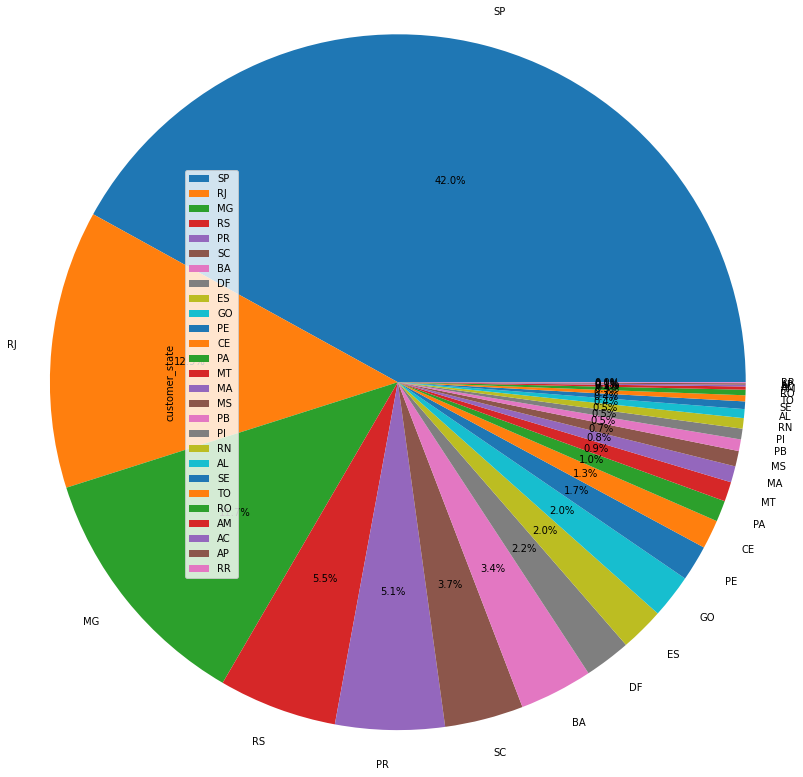

In [46]:
cust_data.customer_state.value_counts().plot(kind='pie',figsize=(10,8),autopct='%.1f%%',radius=2)
plt.legend()
plt.show()

In [47]:
#Top 10 cities with their value counts
cust_data.customer_city.value_counts().sort_values(ascending=False)[:10]

sao paulo                15540
rio de janeiro            6882
belo horizonte            2773
brasilia                  2131
curitiba                  1521
campinas                  1444
porto alegre              1379
salvador                  1245
guarulhos                 1189
sao bernardo do campo      938
Name: customer_city, dtype: int64

In [48]:
order_items.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [49]:
#checking if any null/NA present in any entry
order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [50]:
print('Number of sellers :',order_items.seller_id.unique().shape[0])
print('Number of unique products are : ',order_items.product_id.unique().shape[0])

Number of sellers : 3095
Number of unique products are :  32951


In [51]:
## price feature

In [52]:
order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

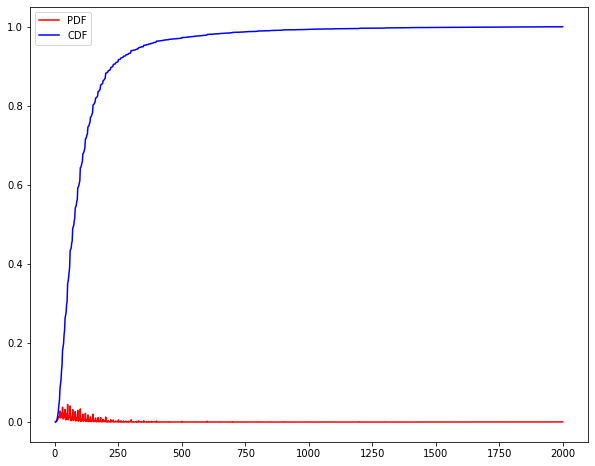

In [53]:
#temporararily removing few outliers that can reduce the smoothness of the pdf and cdf
sata = order_items[order_items.price <= 2000]
counts, bin_edges = np.histogram(sata.price, bins=1000, 
                                 density = True)
pdf = counts/(sum(counts))

#compute CDF
cdf = np.cumsum(pdf)
plt.figure(figsize=(10,8))
plt.plot(bin_edges[1:],pdf,color='red',label='PDF')
plt.plot(bin_edges[1:], cdf,color='blue',label='CDF')
plt.legend()


plt.show();

In [54]:
order_payments.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

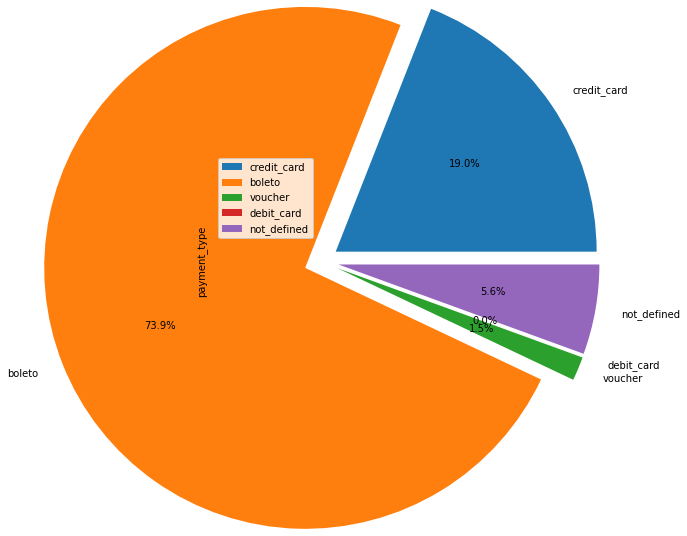

In [55]:
#Most used Payment method for orders
explode = [0.2]*5
order_payments['payment_type'].groupby(order_payments['payment_type']).count().plot(kind='pie',radius=3,labels=order_payments.payment_type.unique(),autopct='%.1f%%',explode=explode)
plt.legend()
plt.show()

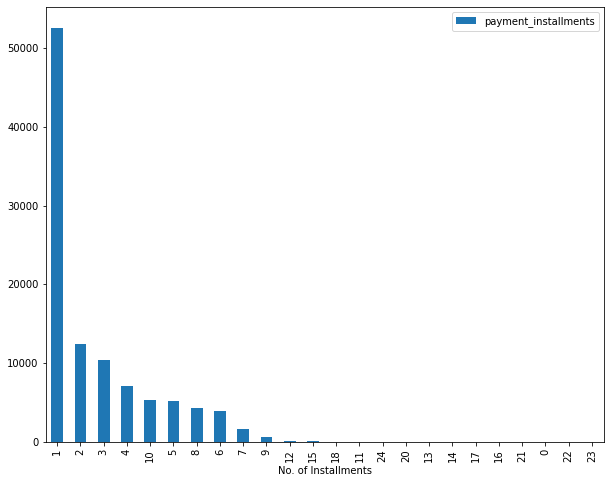

In [56]:
#number of installments feature
order_payments.payment_installments.value_counts().plot(kind = 'bar',figsize=(10,8))
plt.legend()
plt.xlabel('No. of Installments')
plt.show()

In [57]:
#checking if any null/NA present in any entry
order_payments.isnull().any().any()

False

In [58]:
## order_reviews data

In [59]:
order_reviews.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

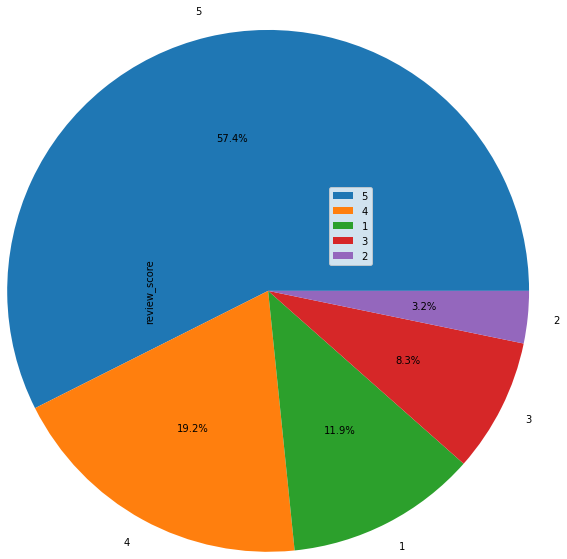

In [60]:
#pie chart for review_score
order_reviews.review_score.value_counts().plot(kind = 'pie',radius=3,autopct='%.1f%%')
plt.legend()
plt.show()

In [61]:
#how many null/missing entries are present
order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       88285
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [62]:
#orders_data

In [63]:
order_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

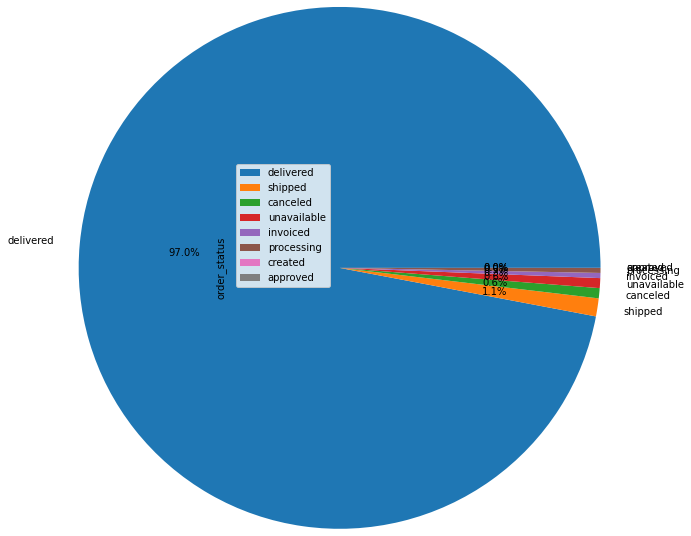

In [64]:
#order_status
order_data.order_status.value_counts().plot(kind='pie',radius=3,autopct='%.1f%%')
plt.legend()
plt.show()

In [65]:
#checking if any null/NA present in any entry
order_data.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [66]:
## products data

In [67]:
products_data.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [68]:
products_data.rename(columns = {'product_name_lenght':'product_name_length',
                       'product_description_lenght':'product_description_length'},inplace=True)

Text(0.5, 0, 'product_description_length')

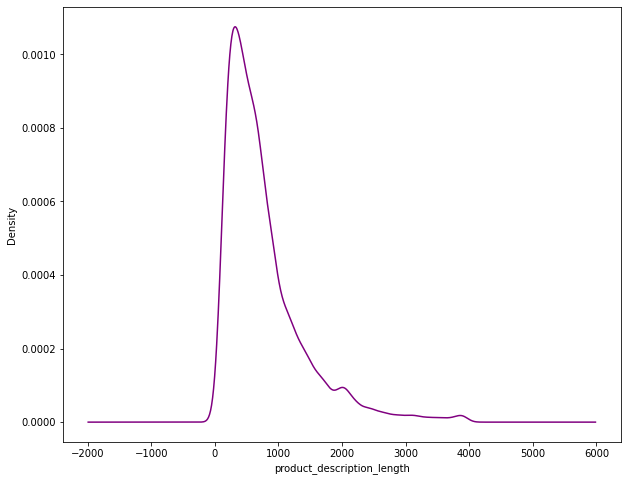

In [69]:
#Density plot of product_description_length and 
products_data.product_description_length.plot(kind='density',figsize=(10,8),color= 'purple')
plt.xlabel('product_description_length')

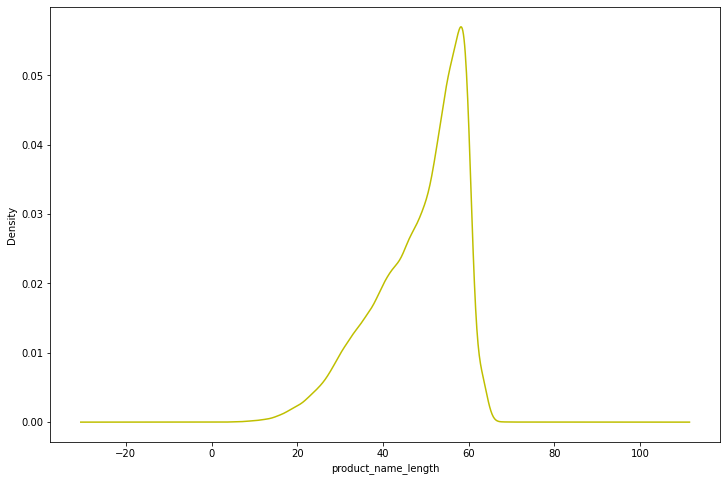

In [70]:
#Density plot of product_description_length
d = products_data.product_name_length

d.plot(kind='kde',figsize=(12,8),color= 'y')
plt.xlabel('product_name_length')
plt.show()

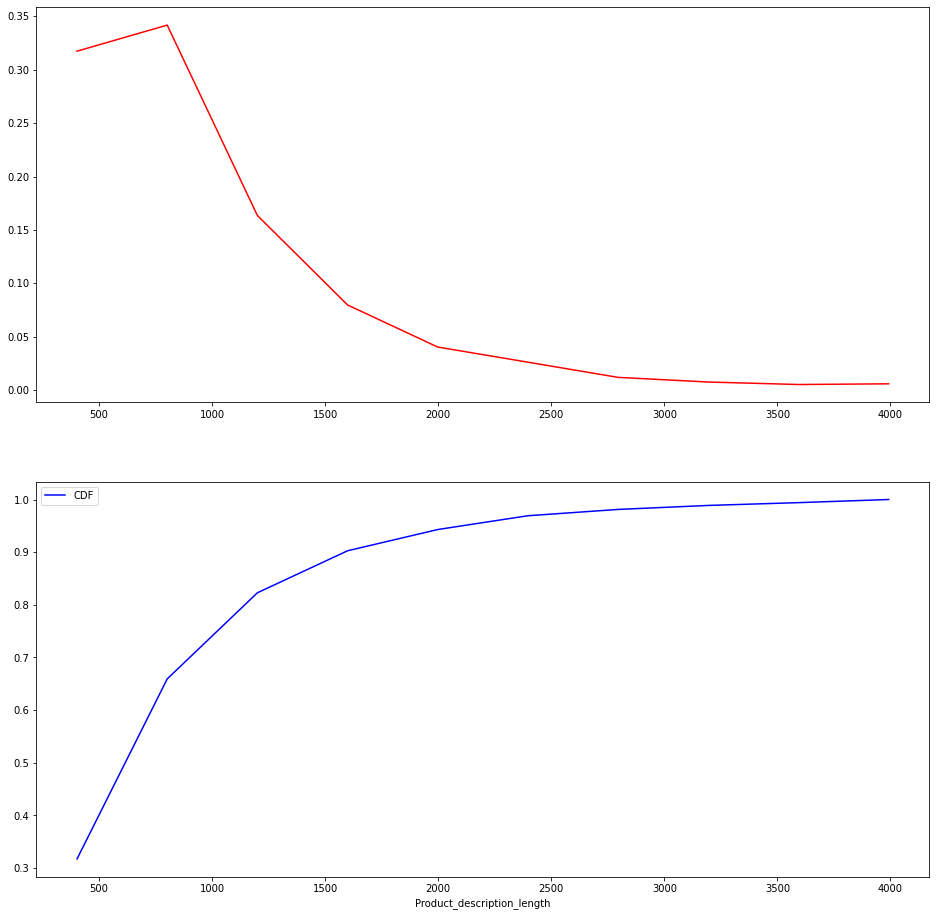

In [71]:
counts, bin_edges = np.histogram(products_data.product_description_length.dropna(), bins=10, 
                                 density = True)
fig,ax = plt.subplots(2,figsize=(16,16))
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
ax[0].plot(bin_edges[1:],pdf,color='red',label='PDF')
ax[1].plot(bin_edges[1:], cdf,color= 'b',label="CDF")
plt.xlabel('Product_description_length')
plt.legend()
plt.show()

In [72]:
## sellers data

In [73]:
sellers_data.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

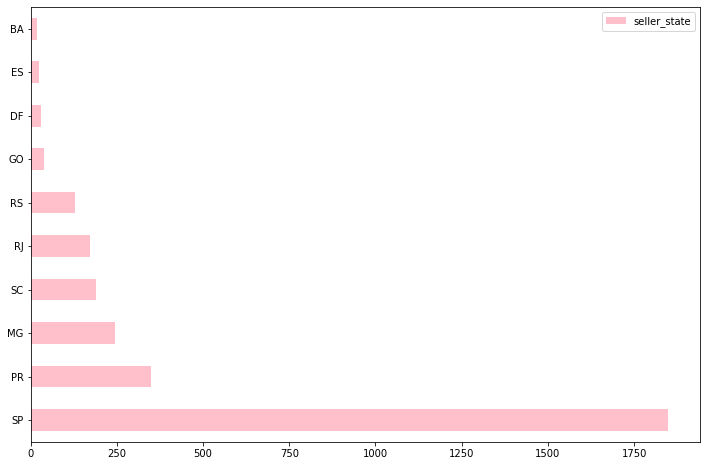

In [74]:
#top 10  seller state
sellers_data.seller_state.value_counts().sort_values(ascending=False)[:10].plot(kind='barh',color='pink',figsize=(12,8))
plt.legend()
plt.show()

In [75]:
#unique sellers
print('Number of unique sellers are: ',sellers_data.seller_id.unique().shape[0])

Number of unique sellers are:  3095


In [76]:
## Data cleaning and preprocessing

In [77]:
#renaming all the zip_code_prefix so as to make the name common in all tables inorder to perform join

geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

NameError: name 'geo_data' is not defined

In [78]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

NameError: name 'geo_data' is not defined

In [79]:
#merging all customer related data

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

NameError: name 'geo_data' is not defined

In [80]:
#merging all seller related data

B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B.shape

(111023, 19)

In [81]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(116581, 40)

In [82]:
#final data columns
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [83]:
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                         0
product_id                            0
seller_id                             0


In [84]:
data.to_csv("olist.csv")

In [85]:
pd.set_option('display.max_columns', None)

In [86]:
data

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
116576  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
116577  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
116578  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
116579  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
116580  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
116576    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
116577    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
116578    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
116579    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
116580    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
116576          2018-02-07 23:22:42           2018-02-28 17:37:56   
116577          2017-08-28 20:52:26           2017-09-21 11:24:17   
116578          2018-01-12 15:35:03           2018-01-25 23:32:54   
116579          2018-01-12 15:35:03           2018-01-25 23:32:54   
116580          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                         review_id  \
0                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3                2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
4                2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
...                              ...                               ...   
116576           2018-03-02 00:00:00  29bb71b2760d0f876dfa178a76bc4734   
116577           2017-09-27 00:00:00  371579771219f6db2d830d50805977bb   
116578           2018-02-15 00:00:00  8ab6855b9fe9b812cd03a480a25058a1   
116579           2018-02-15 00:00:00  8ab6855b9fe9b812cd03a480a25058a1   
116580           2018-04-03 00:00:00  dc9c59b4688062c25758c2be4cafc523   

        review_score review_comment_title  \
0                  4                  NaN   
1                  4                  NaN   
2                  4                  NaN   
3                  4     Muito boa a loja   
4                  5                  NaN   
...              ...                  ...   
116576             4                  NaN   
116577             5                  NaN   
116578             2                  NaN   
116579             2                  NaN   
116580             5                  NaN   

       

In [87]:
## look at how many unique order ids

In [88]:
len(data.order_id.unique())

97255

In [89]:
len(data.customer_id.unique())

97255

In [90]:
## this means each customer only has 1 order

In [91]:
len(data.product_id.unique())

32328

In [92]:
## this means some products has been bought more than 1 times

In [93]:
len(data.seller_id.unique())

3033

In [94]:
## there are 3000 thousands seller

In [95]:
data.head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
7  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
8  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   
9  76c6e866289321a7c93b82b54852dc33  f54a9f0e6b351c431402b8461ea51999   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
5    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
6    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
7    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
8    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   
9    delivered      2017-01-23 18:29:09  2017-01-25 02:50:47   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   
7          2017-07-11 14:58:04           2017-07-26 10:57:55   
8          2017-05-22 10:07:46           2017-05-26 12:55:51   
9          2017-01-26 14:16:31           2017-02-02 14:08:10   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3           2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
4           2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
5           2017-12-15 00:00:00  359d03e676b3c069f62cadba8dd3f6e8   
6           2018-02-26 00:00:00  e50934924e227544ba8246aeb3770dd4   
7           2017-08-01 00:00:00  89b738e70a1ce346db29a20fb2910161   
8           2017-06-07 00:00:00  07d67dd06ed5f88bef11ef6b464e79ae   
9           2017-03-06 00:00:00  fc4af8aea8ec3f1a3cd181d3d0cadbd5   

   review_score review_comment_title  \
0             4                  NaN   
1             4                  NaN   
2             4                  NaN   
3             4     Muito boa a loja   
4             5                  NaN   
5             5                  NaN   
6             5                  NaN   
7             4                  NaN   
8             5                  NaN   
9             1                  NaN   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4                                                NaN  2018-08-18 00:00:00   
5  O produto foi exatamente o que eu esperava e e...  2017-12-03 00:00:00   
6                                                NaN  2018-02-17 00:00:00

create a new feature: delivering time = order_delivered_customer_date - order_purchase_timestamp

create a new feature: carrier_to_deliver time = order_delivered_customer_date - order_purchase_timestamp

create variable: order approved time = order_approved_at - order_purchase_timestamp

create variable time_ahead = order_estimated_delivery_date - order_delivered_customer_date

Question: if we NLP the comments, and put 1, -1, 0 into the model, for new dataset, we cannot predict the review score anymore as new data doesn't have comments in it. We can predict the label class for comments, but wouldn't that be highly correlated on review score? what's the point here?

review_creation_date is redundant as equivalent to order_deliver date+1

In [96]:
data.payment_sequential.value_counts().head(5)

1    111597
2      3328
3       641
4       308
5       184
Name: payment_sequential, dtype: int64

In [97]:
## keep 1 to 1 and others as 0, do one-hot encoding afterwards

In [98]:
data.payment_type.value_counts()

credit_card    86012
boleto         22692
voucher         6211
debit_card      1666
Name: payment_type, dtype: int64

In [99]:
data.groupby(data.review_score).mean()

payment_sequential  payment_installments  payment_value  \
review_score                                                            
1                       1.111714              3.274520     235.438999   
2                       1.102589              3.145657     190.254808   
3                       1.062386              2.992380     168.122756   
4                       1.084844              2.811328     164.030057   
5                       1.096077              2.902335     161.091807   

              customer_zip_code_prefix  order_item_id       price  \
review_score                                                        
1                         36274.626539       1.428524  129.118937   
2                         36098.908541       1.306073  115.883922   
3                         35680.158504       1.219163  109.361897   
4                         35734.414271       1.161602  118.958169   
5                         34382.387116       1.145176  121.442572   

              freight_value  product_name_length  product_description_length  \
review_score                                                                   
1                 21.455265            48.626605                  783.297485   
2                 20.843046            49.114687                  727.578030   
3                 20.254330            49.091851                  770.392705   
4                 20.150450            49.091384                  793.127765   
5                 19.633519            48.618336                  790.170207   

              product_photos_qty  product_weight_g  product_length_cm  \
review_score                                                            
1                       2.089874       2351.074851          30.872071   
2                       2.170336       2301.527946          31.094846   
3                       2.222109       2192.103942          30.850437   
4                       2.241086       2147.505836          30.642049   
5                       2.219032       2027.226778          29.953145   

              product_height_cm  product_width_cm  seller_zip_code_prefix  
review_score                                                               
1                     17.504500         23.244739            23430.136400  
2                     17.221873         23.718364            22132.900315  
3                     16.829100         23.480187            23473.302784  
4                     16.609393         23.215061            24527.713358  
5                     16.396133         22.961819            25049.999527

In [100]:
data.groupby(data.review_score).sum()

payment_sequential  payment_installments  payment_value  \
review_score                                                            
1                          16798                 49478     3557483.27   
2                           4557                 13001      786323.12   
3                          10456                 29451     1654664.16   
4                          23885                 61897     3611449.76   
5                          71770                190042    10548130.44   

              customer_zip_code_prefix  order_item_id         price  \
review_score                                                          
1                            548109607          21585  1.950987e+06   
2                            149196789           5398  4.789483e+05   
3                            351164120          11999  1.076340e+06   
4                            786764599          25575  2.619102e+06   
5                           2251324326          74985  7.951938e+06   

              freight_value  product_name_length  product_description_length  \
review_score                                                                   
1                 324189.06             734748.0                  11835625.0   
2                  86144.31             202991.0                   3007080.0   
3                 199343.12             483162.0                   7582205.0   
4                 443652.46            1080845.0                  17462294.0   
5                1285583.17            3183480.0                  51739555.0   

              product_photos_qty  product_weight_g  product_length_cm  \
review_score                                                            
1                        31578.0        35524741.0           466477.0   
2                         8970.0         9512215.0           128515.0   
3                        21870.0        21574687.0           303630.0   
4                        49342.0        47281636.0           674646.0   
5                       145300.0       132738755.0          1961272.0   

              product_height_cm  product_width_cm  seller_zip_code_prefix  
review_score                                                               
1                      264493.0          351228.0               354029361  
2                       71178.0           98028.0                91475277  
3                      165632.0          231092.0               231024246  
4                      365689.0          511126.0               540026665  
5                     1073586.0         1503494.0              1640248919

In [101]:
data.groupby(data.payment_type).mean()

review_score  payment_sequential  payment_installments  \
payment_type                                                           
boleto            4.012559            1.000044              1.000000   
credit_card       4.018300            1.004255              3.642515   
debit_card        4.147059            1.032413              1.000000   
voucher           3.989857            2.684753              1.000000   

              payment_value  customer_zip_code_prefix  order_item_id  \
payment_type                                                           
boleto           177.344271              37271.219725       1.252203   
credit_card      179.997862              34710.107404       1.187846   
debit_card       150.106759              30272.211285       1.155462   
voucher           64.675666              32986.904041       1.132346   

                   price  freight_value  product_name_length  \
payment_type                                                   
boleto        104.454134      19.722653            48.809272   
credit_card   126.430915      20.191972            48.764021   
debit_card    108.741050      18.700468            49.019208   
voucher       104.862940      19.877438            48.573338   

              product_description_length  product_photos_qty  \
payment_type                                                   
boleto                        790.916446            2.202142   
credit_card                   786.801900            2.210854   
debit_card                    829.283313            2.127851   
voucher                       744.371599            2.154886   

              product_weight_g  product_length_cm  product_height_cm  \
payment_type                                                           
boleto             2000.250617          29.919487          16.355500   
credit_card        2147.998128          30.361617          16.758019   
debit_card         1617.236495          28.423770          14.966387   
voucher            2221.311222          31.688939          16.604573   

              product_width_cm  seller_zip_code_prefix  
payment_type                                            
boleto               22.553631            24580.583818  
credit_card          23.225878            24591.784251  
debit_card           21.924370            22280.300120  
voucher              23.985510            23621.692642

In [102]:
data.payment_type.value_counts()

credit_card    86012
boleto         22692
voucher         6211
debit_card      1666
Name: payment_type, dtype: int64

In [103]:
data.review_score.value_counts()

5    65479
4    22017
1    15110
3     9842
2     4133
Name: review_score, dtype: int64

In [104]:
data.payment_installments.value_counts()

1     58030
2     13515
3     11653
4      7926
10     6867
5      5983
8      5055
6      4587
7      1804
9       724
12      166
15       93
18       38
24       34
11       25
20       21
13       19
14       16
16        7
17        7
21        6
0         3
22        1
23        1
Name: payment_installments, dtype: int64

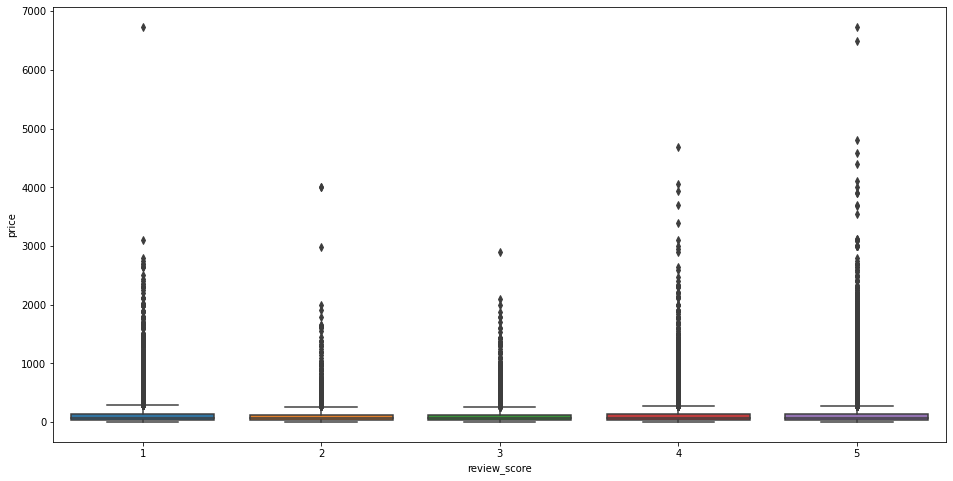

In [105]:
plt.figure(figsize= (16,8))
sns.boxplot(x='review_score',y='price', data=data)
plt.show()

In [106]:
data.groupby(data.seller_state).mean()

review_score  payment_sequential  payment_installments  \
seller_state                                                           
AC                1.000000            1.000000              1.000000   
AM                2.333333            1.000000              3.666667   
BA                4.085714            1.171429              4.285714   
CE                4.155340            1.184466              2.844660   
DF                4.052239            1.144989              2.763326   
ES                3.941953            1.076517              3.311346   
GO                4.238889            1.088889              3.051852   
MA                3.946341            1.009756              2.939024   
MG                4.080558            1.106495              2.957688   
MS                4.500000            1.916667              3.583333   
MT                4.176871            1.013605              3.673469   
PA                4.500000            1.000000              3.750000   
PB                3.902439            1.292683              4.341463   
PE                4.094624            1.047312              2.703226   
PI                4.083333            1.000000              6.500000   
PR                4.061358            1.127146              2.963230   
RJ                4.087694            1.129723              3.226308   
RN                4.267857            1.000000              2.982143   
RO                3.857143            1.000000              6.428571   
RS                4.183601            1.048128              3.248663   
SC                4.084901            1.103481              3.350188   
SE                3.900000            1.000000              6.300000   
SP                3.990760            1.085791              2.888283   

              payment_value  customer_zip_code_prefix  order_item_id  \
seller_state                                                           
AC               299.840000               3531.000000       1.000000   
AM               419.600000              51761.000000       1.000000   
BA               525.968371              41781.955714       1.178571   
CE               250.968641              42366.446602       1.048544   
DF               144.855085              37032.190832       1.132196   
ES               204.047520              36123.308707       1.197889   
GO               204.471352              41375.246296       1.192593   
MA               127.217610              40660.058537       1.041463   
MG               169.737804              35571.402682       1.162985   
MS               180.434000              38070.116667       1.050000   
MT               160.809184              47750.544218       1.068027   
PA               174.138750              20405.625000       1.000000   
PB               490.166829              40239.902439       1.170732   
PE               268.591032              40276.808602       1.152688   
PI               265.375000              51262.666667       1.000000   
PR               204.214367              39266.563961       1.180862   
RJ               219.362956              35517.634472       1.173166   
RN               242.125179              57546.839286       1.089286   
RO               396.662143              32076.000000       1.071429   
RS               247.539947              44061.229055       1.154189   
SC               208.549341              40543.319614       1.201787   
SE               246.613000              48394.200000       1.300000   
SP               159.585610              33751.889992       1.207336   

                   price  freight_value  product_name_length  \
seller_state                                                   
AC            267.000000      32.840000            32.000000   
AM            392.333333      27.266667            54.333333   
BA            458.953843      31.133157            51.044286   
CE            200.207379      44.159029            51.174757   
DF            111.972580    

## we can turn higher rating seller, buyer state > 4.0 to 1 and < 4.0 to 0 and one hot encode

## first, customer state

In [107]:
data.customer_state.value_counts()

SP    49133
RJ    15185
MG    13530
RS     6436
PR     5908
SC     4254
BA     3994
DF     2467
GO     2396
ES     2332
PE     1878
CE     1538
MT     1116
PA     1103
MS      847
MA      838
PB      630
PI      567
RN      565
AL      458
SE      395
TO      334
RO      280
AM      170
AC       93
AP       84
RR       50
Name: customer_state, dtype: int64

In [108]:
pd.DataFrame(data.groupby(data.customer_state).mean()).sort_values(by='review_score',ascending=False)

review_score  payment_sequential  payment_installments  \
customer_state                                                           
AP                  4.226190            1.023810              2.654762   
TO                  4.149701            1.308383              3.032934   
SP                  4.117131            1.109885              2.717094   
PR                  4.094110            1.067705              3.012356   
MS                  4.075561            1.038961              2.894923   
AC                  4.075269            1.032258              3.655914   
AM                  4.070588            1.052941              3.282353   
MG                  4.069549            1.056245              3.066371   
RS                  4.038844            1.078310              3.062306   
RO                  4.035714            1.032143              3.464286   
RN                  4.024779            1.130973              3.690265   
SC                  3.991537            1.036671              2.972026   
DF                  3.987434            1.032023              2.843535   
PB                  3.966667            1.076190              3.725397   
ES                  3.957118            1.045026              3.036878   
PE                  3.948882            1.060703              3.582002   
GO                  3.945743            1.075960              3.144825   
MT                  3.878136            1.418459              3.234767   
PI                  3.834215            1.067019              3.476190   
CE                  3.822497            1.074122              3.620286   
SE                  3.807595            1.035443              3.663291   
RJ                  3.794995            1.117879              3.044715   
BA                  3.793691            1.097897              3.327241   
PA                  3.757026            1.042611              3.362647   
AL                  3.698690            1.037118              3.934498   
MA                  3.667064            1.031026              3.112172   
RR                  3.560000            1.000000              2.960000   

                payment_value  customer_zip_code_prefix  order_item_id  \
customer_state                                                           
AP                 257.651190              68910.535714       1.250000   
TO                 214.088503              77391.943114       1.158683   
SP                 153.733977               9236.834409       1.208760   
PR                 179.232615              84230.721225       1.215978   
MS                 195.242125              79351.793388       1.197166   
AC                 267.285161              69914.322581       1.247312   
AM                 197.406588              69075.300000       1.170588   
MG                 170.778499              35223.075462       1.181670   
RS                 176.427177              94735.509167       1.204941   
RO                 232.025214              76874.878571       1.157143   
RN                 204.639186              59280.527434       1.109735   
SC                 183.264805              88819.440997       1.217442   
DF                 175.408658              71650.565464       1.172274   
PB                 282.193111              58262.568254       1.188889   
ES                 173.881925              29299.827187       1.143654   
PE                 198.064228              53656.864750       1.114483   
GO                 211.887688              74980.908598       1.334725   
MT                 229.308405              78381.077957       1.256272   
PI                 239.897690              64247.795414       1.125220   
CE                 220.290039              61603.269181       1.159948   
SE                 223.327772              49195.010127       1.144304   
RJ                 180.958856              23964.338097       1.180705   
BA                 197.488510              44057.428643       1.171007   
PA                 

In [109]:
pd.DataFrame(data.groupby(data.customer_state).sum()).sort_values(by='review_score',ascending=False)

review_score  payment_sequential  payment_installments  \
customer_state                                                           
SP                    202287               54532                133499   
RJ                     57627               16975                 46234   
MG                     55061               14291                 41488   
RS                     25994                6940                 19709   
PR                     24188                6308                 17797   
SC                     16980                4410                 12643   
BA                     15152                4385                 13289   
DF                      9837                2546                  7015   
GO                      9454                2578                  7535   
ES                      9228                2437                  7082   
PE                      7416                1992                  6727   
CE                      5879                1652                  5568   
MT                      4328                1583                  3610   
PA                      4144                1150                  3709   
MS                      3452                 880                  2452   
MA                      3073                 864                  2608   
PB                      2499                 678                  2347   
RN                      2274                 639                  2085   
PI                      2174                 605                  1971   
AL                      1694                 475                  1802   
SE                      1504                 409                  1447   
TO                      1386                 437                  1013   
RO                      1130                 289                   970   
AM                       692                 179                   558   
AC                       379                  96                   340   
AP                       355                  86                   223   
RR                       178                  50                   148   

                payment_value  customer_zip_code_prefix  order_item_id  \
customer_state                                                           
SP                 7553411.48                 453833385          59390   
RJ                 2747860.23                 363898474          17929   
MG                 2310633.09                 476568211          15988   
RS                 1135485.31                 609717737           7755   
PR                 1058906.29                 497635101           7184   
SC                  779608.48                 377837902           5179   
BA                  788769.11                 175965370           4677   
DF                  432733.16                 176761945           2892   
GO                  507682.90                 179654257           3198   
ES                  405492.65                  68327197           2667   
PE                  371964.62                 100767592           2093   
CE                  338806.08                  94745828           1784   
MT                  255908.18                  87473283           1402   
PA                  251237.69                  74273445           1263   
MS                  165370.08                  67210969           1014   
MA                  196953.12                  54751390            968   
PB                  177781.66                  36705418            749   
RN                  115621.14                  33493498            627   
PI                  136021.99                  36428500            638   
AL                  110896.67                  26205249            506   
SE                   88214.47                  19432029            452   
TO                   71505.56                  25848909            387   
RO                   64967.06                  21524966            324   
AM                 

### on average, the states that give higher ratings, if they also have higher sum review scores, that means the customer there tend to have higher intention to give higher ratings

In [110]:
high_score_cus_states = pd.DataFrame(data.groupby(data.customer_state).mean()).sort_values(by='review_score',ascending=False).head(11).index & pd.DataFrame(data.groupby(data.customer_state).sum()).sort_values(by='review_score',ascending=False).head(10).index
high_score_cus_states

<ipython-input-110-8d04fee8a49e>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  high_score_cus_states = pd.DataFrame(data.groupby(data.customer_state).mean()).sort_values(by='review_score',ascending=False).head(11).index & pd.DataFrame(data.groupby(data.customer_state).sum()).sort_values(by='review_score',ascending=False).head(10).index


Index(['SP', 'PR', 'MG', 'RS'], dtype='object', name='customer_state')

In [111]:
data['customer_state_scores'] = ''

In [112]:
for i in range(len(data.customer_state)):
    if data.customer_state[i] in high_score_cus_states:
        data['customer_state_scores'][i] = 'high'
    else:
        data['customer_state_scores'][i] = 'low'

<ipython-input-112-f6605a897ade>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_state_scores'][i] = 'high'
<ipython-input-112-f6605a897ade>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['customer_state_scores'][i] = 'low'


In [113]:
data['customer_state_scores'].value_counts()

high    75007
low     41574
Name: customer_state_scores, dtype: int64

## second, on customer city

In [114]:
customer_city_mean_score_sort = pd.DataFrame(data.groupby(data.customer_city).mean()).sort_values(by='review_score',ascending=False).head(1017)
customer_city_mean_score_sort

review_score  payment_sequential  payment_installments  \
customer_city                                                                 
abadia dos dourados           5.0                 1.0                 4.000   
jaguaruna                     5.0                 1.0                 2.500   
jequitai                      5.0                 1.0                 3.000   
jaupaci                       5.0                 1.0                 4.000   
jaua                          5.0                 1.0                 1.000   
...                           ...                 ...                   ...   
amambai                       5.0                 1.0                 3.125   
bodoquena                     5.0                 1.0                 3.000   
anage                         5.0                 1.0                 1.000   
alto sao joao                 5.0                 1.0                 3.000   
amontada                      5.0                 1.0                 1.000   

                     payment_value  customer_zip_code_prefix  order_item_id  \
customer_city                                                                 
abadia dos dourados     137.833333                   38540.0           1.00   
jaguaruna                98.445000                   88715.0           1.00   
jequitai                121.650000                   39370.0           1.00   
jaupaci                 105.280000                   76210.0           1.00   
jaua                    177.380000                   42843.0           1.00   
...                            ...                       ...            ...   
amambai                 173.923750                   79990.0           1.25   
bodoquena               247.765000                   79390.0           1.00   
anage                    97.380000                   45180.0           1.50   
alto sao joao            73.250000                   87323.0           1.00   
amontada                 81.570000                   62540.0           1.00   

                          price  freight_value  product_name_length  \
customer_city                                                         
abadia dos dourados  119.633333       18.20000               37.000   
jaguaruna             81.450000       16.99500               52.000   
jequitai             102.090000       19.56000               48.500   
jaupaci               89.900000       15.38000               54.000   
jaua                 149.900000       27.48000               45.000   
...                         ...            ...                  ...   
amambai               93.997500       17.33875               49.875   
bodoquena            214.000000       33.76500               57.500   
anage                 31.900000       16.79000               34.000   
alto sao joao         54.990000       18.26000               51.000   
amontada              45.900000       35.67000               59.000   

                     product_description_length  product_photos_qty  \
customer_city                                                         
abadia dos dourados                  325.333333            1.333333   
jaguaruna                            463.500000            1.500000   
jequitai                             710.000000            4.000000   
jaupaci                              245.000000            1.000000   
jaua                                 911.000000            1.000000   
...                                         ...                 ...   
amambai                              907.750000            3.000000   
bodoquena                           1217.000000            5.000000   
anage                               1078.000000            2.000000   
alto sao joao                        999.000000            2.000000   
amontada                             734.000000            4.000000   

                     product_weight_g  product_length_cm  product_height_cm  \
customer_city                         

In [115]:
customer_city_sum_score_sort = pd.DataFrame(data.groupby(data.customer_city).sum()).sort_values(by='review_score',ascending=False).head(30)
customer_city_sum_score_sort

review_score  payment_sequential  payment_installments  \
customer_city                                                                   
sao paulo                     75577               20827                 47320   
rio de janeiro                31098                9125                 23746   
belo horizonte                12972                3386                  9594   
brasilia                       9769                2529                  6936   
curitiba                       7356                1894                  5315   
campinas                       6861                1990                  4712   
porto alegre                   6429                1691                  5212   
guarulhos                      5598                1623                  3730   
salvador                       5458                1645                  4790   
sao bernardo do campo          4691                1185                  2936   
niteroi                        4034                1172                  2899   
santo andre                    3840                 936                  2368   
osasco                         3715                 983                  2197   
santos                         3399                 864                  2231   
sao jose dos campos            3381                 896                  2076   
goiania                        3271                 974                  2689   
sorocaba                       3042                 763                  2093   
fortaleza                      2839                 797                  2578   
jundiai                        2714                 707                  1886   
recife                         2707                 743                  2293   
florianopolis                  2631                 692                  1937   
ribeirao preto                 2538                 631                  1790   
barueri                        1996                 501                  1268   
juiz de fora                   1984                 515                  1484   
contagem                       1980                 549                  1439   
mogi das cruzes                1958                 571                  1312   
belem                          1913                 530                  1619   
nova iguacu                    1883                 528                  1609   
uberlandia                     1800                 474                  1272   
piracicaba                     1747                 429                  1168   

                       payment_value  customer_zip_code_prefix  order_item_id  \
customer_city                                                                   
sao paulo                 2826299.96                  76482312          22687   
rio de janeiro            1557926.74                 177769802           9726   
belo horizonte             496991.57                  99154082           3809   
brasilia                   430642.95                 175682763           2862   
curitiba                   328703.60                 146211254           2231   
campinas                   264988.42                  22488211           2045   
porto alegre               313152.90                 149166305           1994   
guarulhos                  203890.71                   9901866           1620   
salvador                   285283.98                  61472768           1762   
sao bernardo do campo      147902.99                  10752186           1336   
niteroi                    174839.91                  25360404           1224   
santo andre                121138.76                   8341772           1043   
osasco                     119532.58                   5494602           1090   
santos                     149617.75                   9248284           1085   
sao jose dos campos        106563.75                   9810972            925   
goiania                    210375.37                 

In [116]:
customer_city_lists = []
for item in customer_city_mean_score_sort.index:
    if item in customer_city_sum_score_sort.index:
        customer_city_lists.append(item)

In [117]:
customer_city_lists

[]

#### the result is none, meaning no such cities with higher score on average

## third, we apply on seller state

In [118]:
pd.DataFrame(data.groupby(data.seller_state).mean()).sort_values(by='review_score',ascending=False)

review_score  payment_sequential  payment_installments  \
seller_state                                                           
PA                4.500000            1.000000              3.750000   
MS                4.500000            1.916667              3.583333   
RN                4.267857            1.000000              2.982143   
GO                4.238889            1.088889              3.051852   
RS                4.183601            1.048128              3.248663   
MT                4.176871            1.013605              3.673469   
CE                4.155340            1.184466              2.844660   
PE                4.094624            1.047312              2.703226   
RJ                4.087694            1.129723              3.226308   
BA                4.085714            1.171429              4.285714   
SC                4.084901            1.103481              3.350188   
PI                4.083333            1.000000              6.500000   
MG                4.080558            1.106495              2.957688   
PR                4.061358            1.127146              2.963230   
DF                4.052239            1.144989              2.763326   
SP                3.990760            1.085791              2.888283   
MA                3.946341            1.009756              2.939024   
ES                3.941953            1.076517              3.311346   
PB                3.902439            1.292683              4.341463   
SE                3.900000            1.000000              6.300000   
RO                3.857143            1.000000              6.428571   
AM                2.333333            1.000000              3.666667   
AC                1.000000            1.000000              1.000000   

              payment_value  customer_zip_code_prefix  order_item_id  \
seller_state                                                           
PA               174.138750              20405.625000       1.000000   
MS               180.434000              38070.116667       1.050000   
RN               242.125179              57546.839286       1.089286   
GO               204.471352              41375.246296       1.192593   
RS               247.539947              44061.229055       1.154189   
MT               160.809184              47750.544218       1.068027   
CE               250.968641              42366.446602       1.048544   
PE               268.591032              40276.808602       1.152688   
RJ               219.362956              35517.634472       1.173166   
BA               525.968371              41781.955714       1.178571   
SC               208.549341              40543.319614       1.201787   
PI               265.375000              51262.666667       1.000000   
MG               169.737804              35571.402682       1.162985   
PR               204.214367              39266.563961       1.180862   
DF               144.855085              37032.190832       1.132196   
SP               159.585610              33751.889992       1.207336   
MA               127.217610              40660.058537       1.041463   
ES               204.047520              36123.308707       1.197889   
PB               490.166829              40239.902439       1.170732   
SE               246.613000              48394.200000       1.300000   
RO               396.662143              32076.000000       1.071429   
AM               419.600000              51761.000000       1.000000   
AC               299.840000               3531.000000       1.000000   

                   price  freight_value  product_name_length  \
seller_state                                                   
PA            154.750000      19.388750            49.375000   
MS            173.344833      24.231000            49.183333   
RN            178.439286      23.287679            46.767857   
GO            126.830056      24.092019            48.529630   
RS            173.451533    

In [119]:
pd.DataFrame(data.groupby(data.seller_state).sum()).sort_values(by='review_score',ascending=False)

review_score  payment_sequential  payment_installments  \
seller_state                                                           
SP                  331716               90252                240077   
MG                   37129               10068                 26912   
PR                   36670               10177                 26755   
RJ                   20230                5591                 15967   
SC                   17369                4692                 14245   
RS                    9388                2352                  7290   
DF                    3801                1074                  2592   
BA                    2860                 820                  3000   
GO                    2289                 588                  1648   
PE                    1904                 487                  1257   
MA                    1618                 414                  1205   
ES                    1494                 408                  1255   
MT                     614                 149                   540   
CE                     428                 122                   293   
MS                     270                 115                   215   
RN                     239                  56                   167   
PB                     160                  53                   178   
RO                      54                  14                    90   
PI                      49                  12                    78   
SE                      39                  10                    63   
PA                      36                   8                    30   
AM                       7                   3                    11   
AC                       1                   1                     1   

              payment_value  customer_zip_code_prefix  order_item_id  \
seller_state                                                           
SP             1.326492e+07                2805490848         100355   
MG             1.544444e+06                 323664193          10582   
PR             1.843852e+06                 354537806          10662   
RJ             1.085627e+06                 175776773           5806   
SC             8.867518e+05                 172390195           5110   
RS             5.554796e+05                  98873398           2590   
DF             1.358741e+05                  34736195           1062   
BA             3.681779e+05                  29247369            825   
GO             1.104145e+05                  22342633            644   
PE             1.248948e+05                  18728716            536   
MA             5.215922e+04                  16670624            427   
ES             7.733401e+04                  13690734            454   
MT             2.363895e+04                   7019330            157   
CE             2.584977e+04                   4363744            108   
MS             1.082604e+04                   2284207             63   
RN             1.355901e+04                   3222623             61   
PB             2.009684e+04                   1649836             48   
RO             5.553270e+03                    449064             15   
PI             3.184500e+03                    615152             12   
SE             2.466130e+03                    483942             13   
PA             1.393110e+03                    163245              8   
AM             1.258800e+03                    155283              3   
AC             2.998400e+02                      3531              1   

                     price  freight_value  product_name_length  \
seller_state                                                     
SP            9.036870e+06     1537747.92            4096053.0   
MG            1.045820e+06      220590.90             432783.0   
PR            1.317954e+06      206025.15             433892.0   
RJ            8.589462e+05       96477.43             224729.0   
SC            6.

In [120]:
high_score_seller_states = pd.DataFrame(data.groupby(data.seller_state).mean()).sort_values(by='review_score',ascending=False).head(15).index & pd.DataFrame(data.groupby(data.seller_state).sum()).sort_values(by='review_score',ascending=False).head(10).index
high_score_seller_states

<ipython-input-120-f96184d48315>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  high_score_seller_states = pd.DataFrame(data.groupby(data.seller_state).mean()).sort_values(by='review_score',ascending=False).head(15).index & pd.DataFrame(data.groupby(data.seller_state).sum()).sort_values(by='review_score',ascending=False).head(10).index


Index(['GO', 'RS', 'PE', 'RJ', 'BA', 'SC', 'MG', 'PR', 'DF'], dtype='object', name='seller_state')

In [121]:
data['seller_state_scores'] = ''

In [122]:
for i in range(len(data.seller_state)):
    if data.seller_state[i] in high_score_seller_states:
        data['seller_state_scores'][i] = 'high'
    else:
        data['seller_state_scores'][i] = 'low'

<ipython-input-122-d714ea102c1f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seller_state_scores'][i] = 'low'
<ipython-input-122-d714ea102c1f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['seller_state_scores'][i] = 'high'


In [123]:
data['seller_state_scores'].value_counts()

low     84365
high    32216
Name: seller_state_scores, dtype: int64

## fourth, we apply on seller city

In [124]:
seller_city_high_mean_score = pd.DataFrame(data.groupby(data.seller_city).mean()).sort_values(by='review_score',ascending=False).head(76)
seller_city_high_mean_score

review_score  payment_sequential  \
seller_city                                                   
irece                               5.0                 2.0   
nhandeara                           5.0                 1.0   
mogi das cruzes / sp                5.0                 1.0   
campanha                            5.0                 1.0   
belo horizont                       5.0                 1.0   
...                                 ...                 ...   
sao miguel do oeste                 5.0                 1.0   
formosa                             5.0                 1.0   
sao vicente                         5.0                 1.0   
pelotas                             5.0                 1.0   
sao sebastiao da grama/sp           5.0                 1.0   

                           payment_installments  payment_value  \
seller_city                                                      
irece                                       3.0        363.790   
nhandeara                                   1.0        313.610   
mogi das cruzes / sp                        1.0         68.550   
campanha                                    4.0        106.390   
belo horizont                               3.0        197.720   
...                                         ...            ...   
sao miguel do oeste                         1.0         55.790   
formosa                                     8.5        138.155   
sao vicente                                 5.5        198.805   
pelotas                                     4.0         97.335   
sao sebastiao da grama/sp                   5.0         76.640   

                           customer_zip_code_prefix  order_item_id   price  \
seller_city                                                                  
irece                                        9821.0            1.0  299.89   
nhandeara                                    8472.0            1.0  269.90   
mogi das cruzes / sp                        88820.0            1.0   54.00   
campanha                                     9687.0            1.0   90.00   
belo horizont                               47970.0            1.0  178.90   
...                                             ...            ...     ...   
sao miguel do oeste                         24859.0            1.0   39.00   
formosa                                     36728.5            1.0  109.45   
sao vicente                                 51340.5            1.0  179.00   
pelotas                                     16634.0            1.0   16.95   
sao sebastiao da grama/sp                   11730.0            1.0   61.90   

                           freight_value  product_name_length  \
seller_city                                                     
irece                             63.900                 43.0   
nhandeara                         43.710                 38.0   
mogi das cruzes / sp              14.550                 45.0   
campanha                          16.390                 18.0   
belo horizont                     18.820                 60.0   
...                                  ...                  ...   
sao miguel do oeste               16.790                 16.0   
formosa                           28.705                 37.5   
sao vicente                       19.805                 54.0   
pelotas                           23.805                 31.5   
sao sebastiao da grama/sp         14.740                 42.0   

                           product_description_length  product_photos_qty  \
seller_city                                                                 
irece                                           325.0                 2.0   
nhandeara                                       326.0                 2.0   
mogi das cruzes / sp                            510.0                 4.0   
campanha                                        142.0                 2.0   
belo horizont            

In [125]:
seller_city_high_sum_score = pd.DataFrame(data.groupby(data.seller_city).sum()).sort_values(by='review_score',ascending=False).head(10)
seller_city_high_sum_score

review_score  payment_sequential  payment_installments  \
seller_city                                                                     
sao paulo                    116342               31293                 76108   
ibitinga                      31369                9647                 28807   
curitiba                      13262                3402                 10269   
santo andre                   12784                3339                  8670   
belo horizonte                10863                2730                  6380   
sao jose do rio preto         10684                2886                  7366   
rio de janeiro                 9892                2593                  7264   
ribeirao preto                 9033                2565                  6771   
maringa                        9021                2345                  4608   
guarulhos                      8432                2171                  6329   

                       payment_value  customer_zip_code_prefix  order_item_id  \
seller_city                                                                     
sao paulo                 4232136.55                1004706933          35193   
ibitinga                  1073495.93                 260672978          10290   
curitiba                   648792.08                 127404857           3626   
santo andre                351408.04                 112848008           3729   
belo horizonte             295450.39                  95056851           2859   
sao jose do rio preto      416495.53                  99053146           3786   
rio de janeiro             482655.92                  86384090           2936   
ribeirao preto             388323.51                  80256087           2771   
maringa                    387191.87                  87999582           2867   
guarulhos                  450572.41                  68098940           2532   

                            price  freight_value  product_name_length  \
seller_city                                                             
sao paulo              2786982.33      496953.61            1399040.0   
ibitinga                667832.54      147918.44             433570.0   
curitiba                486893.58       74086.79             152036.0   
santo andre             240632.99       49028.41             160084.0   
belo horizonte          209215.11       47037.84             116785.0   
sao jose do rio preto   203019.04       53565.49             148889.0   
rio de janeiro          360241.04       46550.65             119073.0   
ribeirao preto          290634.65       39825.69             103762.0   
maringa                 213428.44       39772.83             106835.0   
guarulhos               290339.47       43162.21             101592.0   

                       product_description_length  product_photos_qty  \
seller_city                                                             
sao paulo                              21759171.0             76717.0   
ibitinga                                3068692.0             11794.0   
curitiba                                3135675.0              6890.0   
santo andre                             2397580.0              6263.0   
belo horizonte                          1985317.0              5202.0   
sao jose do rio preto                   1178172.0              5170.0   
rio de janeiro                          2686387.0              5288.0   
ribeirao preto                          2244302.0              3876.0   
maringa                                 1246470.0              2549.0   
guarulhos                               1741423.0              4224.0   

                       product_weight_g  product_length_cm  product_height_cm  \
seller_city                                                                     
sao paulo                    47234742.0           810440.0           442153.0   
ibitinga                     14443774.0           322298.0            92461.0   

In [126]:
seller_city_lists = []
for item in seller_city_high_mean_score.index:
    if item in seller_city_high_sum_score.index:
        seller_city_lists.append(item)

In [127]:
seller_city_lists

[]

In [128]:
## there's no such city again

## fifth, based on the review score, if i look at all the seller ids that on average have 5 review_scores, and check if it also exists in the top 40 seller id's that has the highest review scores sums, this means these seller have higher ratings and higher transactions. We one hot encode this.

In [129]:
pd.DataFrame(data.groupby(data.seller_id).mean())

review_score  payment_sequential  \
seller_id                                                            
0015a82c2db000af6aaaf3ae2ecb0532      3.666667            1.000000   
001cca7ae9ae17fb1caed9dfb1094831      3.883817            1.008299   
001e6ad469a905060d959994f1b41e4f      1.000000            1.000000   
002100f778ceb8431b7a1020ff7ab48f      4.033898            1.050847   
004c9cd9d87a3c30c522c48c4fc07416      4.093567            1.035088   
...                                        ...                 ...   
ffcfefa19b08742c5d315f2791395ee5      1.000000            1.000000   
ffdd9f82b9a447f6f8d4b91554cc7dd3      4.285714            1.047619   
ffeee66ac5d5a62fe688b9d26f83f534      4.214286            1.000000   
fffd5413c0700ac820c7069d66d98c89      3.838710            1.016129   
ffff564a4f9085cd26170f4732393726      2.222222            1.000000   

                                  payment_installments  payment_value  \
seller_id                                                               
0015a82c2db000af6aaaf3ae2ecb0532              7.333333     916.020000   
001cca7ae9ae17fb1caed9dfb1094831              3.721992     200.619170   
001e6ad469a905060d959994f1b41e4f              3.000000     267.940000   
002100f778ceb8431b7a1020ff7ab48f              1.440678      42.005593   
004c9cd9d87a3c30c522c48c4fc07416              4.479532     152.266374   
...                                                ...            ...   
ffcfefa19b08742c5d315f2791395ee5              1.000000      79.520000   
ffdd9f82b9a447f6f8d4b91554cc7dd3              3.666667     171.786667   
ffeee66ac5d5a62fe688b9d26f83f534              2.571429     161.396429   
fffd5413c0700ac820c7069d66d98c89              3.532258     207.004355   
ffff564a4f9085cd26170f4732393726              1.944444      87.786667   

                                  customer_zip_code_prefix  order_item_id  \
seller_id                                                                   
0015a82c2db000af6aaaf3ae2ecb0532              53864.000000       1.000000   
001cca7ae9ae17fb1caed9dfb1094831              38450.585062       1.219917   
001e6ad469a905060d959994f1b41e4f               4945.000000       1.000000   
002100f778ceb8431b7a1020ff7ab48f              36086.440678       1.101695   
004c9cd9d87a3c30c522c48c4fc07416              36384.064327       1.105263   
...                                                    ...            ...   
ffcfefa19b08742c5d315f2791395ee5              80250.000000       1.000000   
ffdd9f82b9a447f6f8d4b91554cc7dd3              43085.047619       1.095238   
ffeee66ac5d5a62fe688b9d26f83f534              36732.000000       1.000000   
fffd5413c0700ac820c7069d66d98c89              38156.725806       1.080645   
ffff564a4f9085cd26170f4732393726              39656.388889       1.000000   

                                       price  freight_value  \
seller_id                                                     
0015a82c2db000af6aaaf3ae2ecb0532  895.000000      21.020000   
001cca7ae9ae17fb1caed9dfb1094831  104.767344      37.039212   
001e6ad469a905060d959994f1b41e4f  250.000000      17.940000   
002100f778ceb8431b7a1020ff7ab48f   22.086441      14.208644   
004c9cd9d87a3c30c522c48c4fc07416  113.309942      19.155322   
...                                      ...            ...   
ffcfefa19b08742c5d315f2791395ee5   69.900000       9.620000   
ffdd9f82b9a447f6f8d4b91554cc7dd3  101.942857      35.425238   
ffeee66ac5d5a62fe688b9d26f83f534  131.418571      29.977857   
fffd5413c0700ac820c7069d66d98c89  150.982258      47.034516   
ffff564a4f9085cd26170f4732393726   70.461111      17.325556   

                                  product_name_length  \
seller_id                                               
0015a82c2db000af6aaaf3ae2ecb0532            40.000000   
001cca7ae9ae17fb1caed9dfb1094831            35.842324   
001e6ad469a905060d959994f1b41e4f            58.000000   
002100f778ceb8431b7a1020ff7ab48f            55.203390   
004c9cd9d

In [130]:
pd.DataFrame(data.groupby(data.seller_id).sum())

review_score  payment_sequential  \
seller_id                                                            
0015a82c2db000af6aaaf3ae2ecb0532            11                   3   
001cca7ae9ae17fb1caed9dfb1094831           936                 243   
001e6ad469a905060d959994f1b41e4f             1                   1   
002100f778ceb8431b7a1020ff7ab48f           238                  62   
004c9cd9d87a3c30c522c48c4fc07416           700                 177   
...                                        ...                 ...   
ffcfefa19b08742c5d315f2791395ee5             1                   1   
ffdd9f82b9a447f6f8d4b91554cc7dd3            90                  22   
ffeee66ac5d5a62fe688b9d26f83f534            59                  14   
fffd5413c0700ac820c7069d66d98c89           238                  63   
ffff564a4f9085cd26170f4732393726            40                  18   

                                  payment_installments  payment_value  \
seller_id                                                               
0015a82c2db000af6aaaf3ae2ecb0532                    22        2748.06   
001cca7ae9ae17fb1caed9dfb1094831                   897       48349.22   
001e6ad469a905060d959994f1b41e4f                     3         267.94   
002100f778ceb8431b7a1020ff7ab48f                    85        2478.33   
004c9cd9d87a3c30c522c48c4fc07416                   766       26037.55   
...                                                ...            ...   
ffcfefa19b08742c5d315f2791395ee5                     1          79.52   
ffdd9f82b9a447f6f8d4b91554cc7dd3                    77        3607.52   
ffeee66ac5d5a62fe688b9d26f83f534                    36        2259.55   
fffd5413c0700ac820c7069d66d98c89                   219       12834.27   
ffff564a4f9085cd26170f4732393726                    35        1580.16   

                                  customer_zip_code_prefix  order_item_id  \
seller_id                                                                   
0015a82c2db000af6aaaf3ae2ecb0532                    161592              3   
001cca7ae9ae17fb1caed9dfb1094831                   9266591            294   
001e6ad469a905060d959994f1b41e4f                      4945              1   
002100f778ceb8431b7a1020ff7ab48f                   2129100             65   
004c9cd9d87a3c30c522c48c4fc07416                   6221675            189   
...                                                    ...            ...   
ffcfefa19b08742c5d315f2791395ee5                     80250              1   
ffdd9f82b9a447f6f8d4b91554cc7dd3                    904786             23   
ffeee66ac5d5a62fe688b9d26f83f534                    514248             14   
fffd5413c0700ac820c7069d66d98c89                   2365717             67   
ffff564a4f9085cd26170f4732393726                    713815             18   

                                     price  freight_value  \
seller_id                                                   
0015a82c2db000af6aaaf3ae2ecb0532   2685.00          63.06   
001cca7ae9ae17fb1caed9dfb1094831  25248.93        8926.45   
001e6ad469a905060d959994f1b41e4f    250.00          17.94   
002100f778ceb8431b7a1020ff7ab48f   1303.10         838.31   
004c9cd9d87a3c30c522c48c4fc07416  19376.00        3275.56   
...                                    ...            ...   
ffcfefa19b08742c5d315f2791395ee5     69.90           9.62   
ffdd9f82b9a447f6f8d4b91554cc7dd3   2140.80         743.93   
ffeee66ac5d5a62fe688b9d26f83f534   1839.86         419.69   
fffd5413c0700ac820c7069d66d98c89   9360.90        2916.14   
ffff564a4f9085cd26170f4732393726   1268.30         311.86   

                                  product_name_length  \
seller_id                                               
0015a82c2db000af6aaaf3ae2ecb0532                120.0   
001cca7ae9ae17fb1caed9dfb1094831               8638.0   
001e6ad469a905060d959994f1b41e4f                 58.0   
002100f778ceb8431b7a1020ff7ab48f               3257.0   
004c9cd9d87a3c30c522c48c4fc07416   

In [131]:
average_seller_review_score = pd.DataFrame(data.groupby(data.seller_id).mean()).sort_values(by='review_score',ascending=False).head(500)
average_seller_review_score

review_score  payment_sequential  \
seller_id                                                            
d3891911c2feae53c52fea2bd14054e5           5.0            1.000000   
1927cdb9fa74f5270097f6250e8e8f34           5.0            1.000000   
226b05fe067266c59c15dae208213d06           5.0            1.000000   
228e4c1a0be164f613d41c24345f9d2c           5.0            1.285714   
f5b84683a9bf9e1df748cf40f601b39c           5.0            1.000000   
...                                        ...                 ...   
f9bbdd976532d50b7816d285a22bd01e           5.0            1.333333   
ce3ad9de960102d0677a81f5d0bb7b2d           5.0            1.000000   
979e9f8b5b39dd243a2550c8b05aecf0           5.0            1.000000   
186cdd1b2df32caa72cfb410bba768d3           5.0            1.000000   
c3fe93ba3085f92855c97e57f38c8c05           5.0            1.000000   

                                  payment_installments  payment_value  \
seller_id                                                               
d3891911c2feae53c52fea2bd14054e5              3.000000      83.495000   
1927cdb9fa74f5270097f6250e8e8f34              1.000000     178.920000   
226b05fe067266c59c15dae208213d06              2.000000     101.200000   
228e4c1a0be164f613d41c24345f9d2c              3.142857     109.920000   
f5b84683a9bf9e1df748cf40f601b39c              5.000000      92.970000   
...                                                ...            ...   
f9bbdd976532d50b7816d285a22bd01e              2.000000      99.456667   
ce3ad9de960102d0677a81f5d0bb7b2d              3.000000     174.210000   
979e9f8b5b39dd243a2550c8b05aecf0              2.500000     184.360000   
186cdd1b2df32caa72cfb410bba768d3              2.500000     268.288333   
c3fe93ba3085f92855c97e57f38c8c05              1.428571      51.281429   

                                  customer_zip_code_prefix  order_item_id  \
seller_id                                                                   
d3891911c2feae53c52fea2bd14054e5              18676.000000           1.00   
1927cdb9fa74f5270097f6250e8e8f34              29314.000000           1.00   
226b05fe067266c59c15dae208213d06              24220.000000           1.00   
228e4c1a0be164f613d41c24345f9d2c              31017.714286           1.00   
f5b84683a9bf9e1df748cf40f601b39c               5074.000000           1.00   
...                                                    ...            ...   
f9bbdd976532d50b7816d285a22bd01e              94333.333333           1.00   
ce3ad9de960102d0677a81f5d0bb7b2d              30310.000000           1.00   
979e9f8b5b39dd243a2550c8b05aecf0              28652.000000           1.25   
186cdd1b2df32caa72cfb410bba768d3              43852.666667           1.00   
c3fe93ba3085f92855c97e57f38c8c05              30998.428571           1.00   

                                       price  freight_value  \
seller_id                                                     
d3891911c2feae53c52fea2bd14054e5   70.500000      12.995000   
1927cdb9fa74f5270097f6250e8e8f34  120.000000      58.920000   
226b05fe067266c59c15dae208213d06   83.900000      17.300000   
228e4c1a0be164f613d41c24345f9d2c  107.085714      45.252857   
f5b84683a9bf9e1df748cf40f601b39c   83.900000       9.070000   
...                                      ...            ...   
f9bbdd976532d50b7816d285a22bd01e  119.000000      15.246667   
ce3ad9de960102d0677a81f5d0bb7b2d  158.000000      16.210000   
979e9f8b5b39dd243a2550c8b05aecf0  131.250000      11.720000   
186cdd1b2df32caa72cfb410bba768d3  223.575000      44.713333   
c3fe93ba3085f92855c97e57f38c8c05   35.000000      16.281429   

                                  product_name_length  \
seller_id                                               
d3891911c2feae53c52fea2bd14054e5            32.500000   
1927cdb9fa74f5270097f6250e8e8f34            56.000000   
226b05fe067266c59c15dae208213d06            51.000000   
228e4c1a0be164f613d41c24345f9d2c            45.857143   
f5b84683a

In [132]:
review_score_sum = pd.DataFrame(data.groupby(data.seller_id).sum()).sort_values(by='review_score',ascending=False).head(40)
review_score_sum

review_score  payment_sequential  \
seller_id                                                            
6560211a19b47992c3666cc44a7e94c0          8291                2252   
4a3ca9315b744ce9f8e9374361493884          8138                2610   
1f50f920176fa81dab994f9023523100          8018                2178   
cc419e0650a3c5ba77189a1882b7556a          7654                2009   
da8622b14eb17ae2831f4ac5b9dab84a          6759                1915   
955fee9216a65b617aa5c0531780ce60          6178                1571   
1025f0e2d44d7041d6cf58b6550e0bfa          5682                1518   
7a67c85e85bb2ce8582c35f2203ad736          5241                1401   
7c67e1448b00f6e969d365cea6b010ab          4960                1888   
3d871de0142ce09b7081e2b9d1733cb1          4940                1313   
ea8482cd71df3c1969d7b9473ff13abc          4889                1278   
4869f7a5dfa277a7dca6462dcf3b52b2          4859                1224   
8b321bb669392f5163d04c59e235e066          4115                1048   
620c87c171fb2a6dd6e8bb4dec959fc6          3479                 861   
cca3071e3e9bb7d12640c9fbe2301306          3403                1054   
a1043bafd471dff536d0c462352beb48          3347                 930   
f8db351d8c4c4c22c6835c19a46f01b0          3199                 821   
e9779976487b77c6d4ac45f75ec7afe9          3172                 778   
fa1c13f2614d7b5c4749cbc52fecda94          2638                 635   
391fc6631aebcf3004804e51b40bcf1e          2527                 661   
d2374cbcbb3ca4ab1086534108cc3ab7          2520                 756   
128639473a139ac0f3e5f5ade55873a5          2394                 599   
7d13fca15225358621be4086e1eb0964          2383                 639   
d91fb3b7d041e83b64a00a3edfb37e4f          2331                 580   
85d9eb9ddc5d00ca9336a2219c97bb13          2309                 581   
53e4c6e0f4312d4d2107a8c9cddf45cd          2254                 652   
1900267e848ceeba8fa32d80c1a5f5a8          2231                 954   
46dc3b2cc0980fb8ec44634e21d2718e          2155                 536   
1835b56ce799e6a4dc4eddc053f04066          2059                 599   
dbc22125167c298ef99da25668e1011f          1970                 588   
9f505651f4a6abe901a56cdc21508025          1964                 516   
8581055ce74af1daba164fdbd55a40de          1938                 474   
218d46b86c1881d022bce9c68a7d4b15          1801                 443   
4e922959ae960d389249c378d1c939f5          1792                 508   
53243585a1d6dc2643021fd1853d8905          1776                 491   
4d6d651bd7684af3fffabd5f08d12e5a          1720                 433   
2138ccb85b11a4ec1e37afbd1c8eda1f          1718                 457   
8160255418d5aaa7dbdc9f4c64ebda44          1710                 459   
16090f2ca825584b5a147ab24aa30c86          1674                 422   
7299e27ed73d2ad986de7f7c77d919fa          1645                 381   

                                  payment_installments  payment_value  \
seller_id                                                               
6560211a19b47992c3666cc44a7e94c0                  5448      180028.11   
4a3ca9315b744ce9f8e9374361493884                  8394      306138.80   
1f50f920176fa81dab994f9023523100                  5181      291918.98   
cc419e0650a3c5ba77189a1882b7556a                  5028      144535.03   
da8622b14eb17ae2831f4ac5b9dab84a                  5724      276578.63   
955fee9216a65b617aa5c0531780ce60                  3694      236414.48   
1025f0e2d44d7041d6cf58b6550e0bfa                  4974      312456.49   
7a67c85e85bb2ce8582c35f2203ad736                  3679      169734.22   
7c67e1448b00f6e969d365cea6b010ab                  5655      512645.19   
3d871de0142ce09b7081e2b9d1733cb1                  3157      132043.94   
ea8482cd71df3c1969d7b9473ff13abc                  2687       61708.19   
4869f7a5dfa277a7dca6462dcf3b52b2                  4756      264166.12   
8b321bb669392f5163d04c59e235e066                  1236       39512.01  

In [133]:
seller_lists = []
for item in data[data.review_score==5]['seller_id']:
    if item in review_score_sum.index:
        seller_lists.append(item)

In [134]:
len(seller_lists)

19306

In [135]:
len(data.seller_id.unique())

3033

In [136]:
seller_lists = np.unique(seller_lists)
len(seller_lists)

40

In [137]:
## 40 out of 3000 seller ids have very good review scores

In [138]:
data['influential_seller'] = ""

In [139]:
for i in range(len(data.seller_id)):
    if data.seller_id[i] in seller_lists:
        data['influential_seller'][i] = 'influence'
    else:
        data['influential_seller'][i] = 'not'

<ipython-input-139-5e30a025d652>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['influential_seller'][i] = 'not'
<ipython-input-139-5e30a025d652>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['influential_seller'][i] = 'influence'


## sixth, based on the review score, if i look at all the customer ids that on average have 5 review_scores, and check if it also exists in the top 40 customer id's that has the highest review scores sums, this means these buyer have higher ratings and higher transactions. We one hot encode this.

In [140]:
average_customer_review_score = pd.DataFrame(data.groupby(data.customer_id).mean()).sort_values(by='review_score',ascending=False).head(56211)
average_customer_review_score

review_score  payment_sequential  \
customer_id                                                          
ffffa3172527f765de70084a7e53aae8           5.0                 1.0   
f01b83934eef46cde6b154916592bb15           5.0                 1.0   
89416a146914adecfbaf6520ff962e34           5.0                 1.0   
8941b349c86c4d2d9bc5487da97276ef           5.0                 1.0   
894202b8ef01f4719a4691e79dd24c17           5.0                 1.0   
...                                        ...                 ...   
0b9d5b8ca1d0aee387d35522fcf8785c           5.0                 1.0   
44e0ea3bfdf99e48cf4c76bb3b134ede           5.0                 1.0   
4b5df8f7bd263b1c620fbbe1bfc94369           5.0                 1.0   
47a66daa8a760e22ef564084cbfbfd1b           5.0                 1.0   
45734e91784cbe205cb096380e8197a0           5.0                 1.0   

                                  payment_installments  payment_value  \
customer_id                                                             
ffffa3172527f765de70084a7e53aae8                   4.0          45.50   
f01b83934eef46cde6b154916592bb15                   3.0         130.27   
89416a146914adecfbaf6520ff962e34                   1.0          58.13   
8941b349c86c4d2d9bc5487da97276ef                   3.0         167.74   
894202b8ef01f4719a4691e79dd24c17                   8.0         472.72   
...                                                ...            ...   
0b9d5b8ca1d0aee387d35522fcf8785c                   1.0          35.36   
44e0ea3bfdf99e48cf4c76bb3b134ede                  10.0         137.09   
4b5df8f7bd263b1c620fbbe1bfc94369                   1.0          22.54   
47a66daa8a760e22ef564084cbfbfd1b                   1.0          49.62   
45734e91784cbe205cb096380e8197a0                   1.0          58.18   

                                  customer_zip_code_prefix  order_item_id  \
customer_id                                                                 
ffffa3172527f765de70084a7e53aae8                   37130.0            1.5   
f01b83934eef46cde6b154916592bb15                   58428.0            1.0   
89416a146914adecfbaf6520ff962e34                   89107.0            1.0   
8941b349c86c4d2d9bc5487da97276ef                    7241.0            1.5   
894202b8ef01f4719a4691e79dd24c17                   63430.0            1.0   
...                                                    ...            ...   
0b9d5b8ca1d0aee387d35522fcf8785c                    1305.0            1.0   
44e0ea3bfdf99e48cf4c76bb3b134ede                   82310.0            1.0   
4b5df8f7bd263b1c620fbbe1bfc94369                   21215.0            1.0   
47a66daa8a760e22ef564084cbfbfd1b                   55770.0            1.0   
45734e91784cbe205cb096380e8197a0                   22790.0            1.0   

                                   price  freight_value  product_name_length  \
customer_id                                                                    
ffffa3172527f765de70084a7e53aae8   10.90          11.85                 39.0   
f01b83934eef46cde6b154916592bb15   79.00          51.27                 56.0   
89416a146914adecfbaf6520ff962e34   39.90          18.23                 56.0   
8941b349c86c4d2d9bc5487da97276ef   74.99           8.88                 53.0   
894202b8ef01f4719a4691e79dd24c17  399.00          73.72                 60.0   
...                                  ...            ...                  ...   
0b9d5b8ca1d0aee387d35522fcf8785c   27.90           7.46                 49.0   
44e0ea3bfdf99e48cf4c76bb3b134ede  129.00           8.09                 40.0   
4b5df8f7bd263b1c620fbbe1bfc94369   14.99           7.55                 49.0   
47a66daa8a760e22ef564084cbfbfd1b   23.99          25.63                 59.0   
45734e91784cbe205cb096380e8197a0   39.90          18.28                 55.0   

                                  product_description_length  \
customer_id                                                    
ff

In [141]:
review_score_sum_customer = pd.DataFrame(data.groupby(data.customer_id).sum()).sort_values(by='review_score',ascending=False).head(40)
review_score_sum_customer

review_score  payment_sequential  \
customer_id                                                          
270c23a11d024a44c896d1894b261a83           315                 693   
13aa59158da63ba0e93ec6ac2c07aacb           190                 380   
92cd3ec6e2d643d4ebd0e3d6238f69e2           130                 351   
63b964e79dee32a3587651701a2b8dbf           120                 156   
b246eeed30b362c09d867b9e598bee51           110                 253   
6ee2f17e3b6c33d6a9557f280edd2925            96                 156   
5e0f7317756669ff7b384444dbb81fa3            84                  84   
1d4411212e90d6a24fd2d09f74878b48            80                  40   
42568702f6b7a0d94ad168a4b1dbe0eb            75                  45   
10de381f8a8d23fff822753305f71cae            75                  15   
de832e8dbb1f588a47013e53feaa67cc            75                 120   
54ca6dc5e99a82fe5112744bc4e9ef26            75                  45   
adb32467ecc74b53576d9d13a5a55891            75                  15   
1eebfdb7083031b40f727fb71f6cd5b2            75                 120   
1d48a5dcde374b9d63b2c29e6af97cb8            72                  72   
d22f25a9fadfb1abbc2e29395b1239f4            72                  60   
d1ea705f2fdd8f98eff86c2691652e60            70                 105   
7bb57d182bdc11653fac1593436df8bf            70                 105   
2cde5a202365766c4eeabc925e58225f            60                  78   
7cfe09e5bc5e9f1fab1a57d8ddd8eaee            60                  78   
ba53e87622e90e0a905d871c0c8d53af            60                  30   
9b43e2a62de9bab3ad220e858e95ccbc            60                  42   
c98632bdc4c3bd2066cdea237cf8f468            60                  78   
0d93f21f3e8543a9d0d8ece01561f5b2            60                  12   
c3539d3d4dfb2fe3b6de4bb8f277e989            60                  18   
7edaf2c4de16b035306651cc8840587a            55                  66   
5967895f1299e02b1b0cb7a8ef4a437b            55                  66   
126e796f3f459d75233ffae11eda5001            55                  66   
0fce8fa7269758a9711ebafed7c8bf65            55                  66   
3b3a94e8869494140c9338cf3034a920            55                  66   
2b0bd5eca653853a14cd538cc974a7d0            55                  66   
48d6a6909a9bd0b2128ea79630e52d13            54                  12   
c7e04083bffe04edab6d27fb982dc6cc            52                  91   
5152585f73b24d675bd2e8316b4fa99d            52                  91   
1ff773612ab8934db89fd5afa8afe506            50                  10   
521ecef28ca5c3c9f3f816c2712fb016            50                  55   
6364e6758c586ecffceded7d3a988efb            50                  30   
4fff50831fb0de5d5461901048e2df79            50                  15   
2b8139c2d4525cf24d1193894346b2fe            50                  55   
d6646ea91d8cd9fc7e6882a7068779d4            50                  10   

                                  payment_installments  payment_value  \
customer_id                                                             
270c23a11d024a44c896d1894b261a83                    63         483.96   
13aa59158da63ba0e93ec6ac2c07aacb                    38         411.48   
92cd3ec6e2d643d4ebd0e3d6238f69e2                    26          62.68   
63b964e79dee32a3587651701a2b8dbf                    32        1758.88   
b246eeed30b362c09d867b9e598bee51                    22          40.85   
6ee2f17e3b6c33d6a9557f280edd2925                    28         850.80   
5e0f7317756669ff7b384444dbb81fa3                    21         332.46   
1d4411212e90d6a24fd2d09f74878b48                    16         460.64   
42568702f6b7a0d94ad168a4b1dbe0eb                    18         621.63   
10de381f8a8d23fff822753305f71cae                   150       18384.75   
de832e8dbb1f588a47013e53feaa67cc                    15         740.76   
54ca6dc5e99a82fe5112744bc4e9ef26                    15         509.01   
adb32467ecc74b53576d9d13a5a55891                   150       11745.00  

In [142]:
customer_lists = []
for item in data[data.review_score==5]['customer_id']:
    if item in review_score_sum_customer.index:
        customer_lists.append(item)

In [143]:
len(customer_lists)

531

In [144]:
len(data.customer_id.unique())

97255

In [145]:
customer_lists = np.unique(customer_lists)
len(customer_lists)

35

In [146]:
## 35 out of 97255 customers are very active and give higher ratings

In [147]:
data['influential_customer'] = ''

In [148]:
for i in range(len(data.customer_id)):
    if data.customer_id[i] in customer_lists:
        data['influential_customer'][i] = 'influence'
    else:
        data['influential_customer'][i] = 'not'

<ipython-input-148-21a01495a32b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['influential_customer'][i] = 'not'
<ipython-input-148-21a01495a32b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['influential_customer'][i] = 'influence'


In [149]:
data['influential_customer'].value_counts()

not          116036
influence       545
Name: influential_customer, dtype: int64

## seventh, if we look at the high_score_seller_states and high_score_customer_states and there's a overlappings, that means very strong likely to give higher ratings

In [150]:
overlappings = high_score_seller_states & high_score_cus_states
overlappings

<ipython-input-150-65bc762dbe28>:1: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead
  overlappings = high_score_seller_states & high_score_cus_states


Index(['RS', 'MG', 'PR'], dtype='object')

In [151]:
data['same_state_influential'] = ''

In [152]:
for i in range(len(data)):
    if data.seller_state[i] == data.customer_state[i] and data.customer_state[i] in overlappings:
        data['same_state_influential'][i] = 'influential'
    else:
        data['same_state_influential'][i] = 'not'

<ipython-input-152-928b45d7d4c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['same_state_influential'][i] = 'not'
<ipython-input-152-928b45d7d4c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['same_state_influential'][i] = 'influential'


In [153]:
data['same_state_influential'].value_counts()

not            113661
influential      2920
Name: same_state_influential, dtype: int64

In [154]:
data

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
116576  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
116577  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
116578  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
116579  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
116580  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
...             ...                      ...                  ...   
116576    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
116577    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
116578    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
116579    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
116580    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2017-10-04 19:55:00           2017-10-10 21:25:13   
2               2017-10-04 19:55:00           2017-10-10 21:25:13   
3               2018-07-26 14:31:00           2018-08-07 15:27:45   
4               2018-08-08 13:50:00           2018-08-17 18:06:29   
...                             ...                           ...   
116576          2018-02-07 23:22:42           2018-02-28 17:37:56   
116577          2017-08-28 20:52:26           2017-09-21 11:24:17   
116578          2018-01-12 15:35:03           2018-01-25 23:32:54   
116579          2018-01-12 15:35:03           2018-01-25 23:32:54   
116580          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                         review_id  \
0                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2                2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3                2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
4                2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
...                              ...                               ...   
116576           2018-03-02 00:00:00  29bb71b2760d0f876dfa178a76bc4734   
116577           2017-09-27 00:00:00  371579771219f6db2d830d50805977bb   
116578           2018-02-15 00:00:00  8ab6855b9fe9b812cd03a480a25058a1   
116579           2018-02-15 00:00:00  8ab6855b9fe9b812cd03a480a25058a1   
116580           2018-04-03 00:00:00  dc9c59b4688062c25758c2be4cafc523   

        review_score review_comment_title  \
0                  4                  NaN   
1                  4                  NaN   
2                  4                  NaN   
3                  4     Muito boa a loja   
4                  5                  NaN   
...              ...                  ...   
116576             4                  NaN   
116577             5                  NaN   
116578             2                  NaN   
116579             2                  NaN   
116580             5                  NaN   

       

In [155]:
## done

In [178]:
nlp = data[['review_score','review_comment_message']].dropna()
nlp

review_score                             review_comment_message
0                  4  Não testei o produto ainda, mas ele veio corre...
1                  4  Não testei o produto ainda, mas ele veio corre...
2                  4  Não testei o produto ainda, mas ele veio corre...
3                  4                               Muito bom o produto.
5                  5  O produto foi exatamente o que eu esperava e e...
...              ...                                                ...
116567             1  Ele não é um mini cajon, é um shaker, ou seja,...
116576             4       So uma peça que veio rachado mas tudo bem rs
116577             5                       Foi entregue antes do prazo.
116578             2  Foi entregue somente 1. Quero saber do outro p...
116579             2  Foi entregue somente 1. Quero saber do outro p...

[49878 rows x 2 columns]

In [179]:
nlp = nlp.reset_index()

In [180]:
nlp

index  review_score                             review_comment_message
0           0             4  Não testei o produto ainda, mas ele veio corre...
1           1             4  Não testei o produto ainda, mas ele veio corre...
2           2             4  Não testei o produto ainda, mas ele veio corre...
3           3             4                               Muito bom o produto.
4           5             5  O produto foi exatamente o que eu esperava e e...
...       ...           ...                                                ...
49873  116567             1  Ele não é um mini cajon, é um shaker, ou seja,...
49874  116576             4       So uma peça que veio rachado mas tudo bem rs
49875  116577             5                       Foi entregue antes do prazo.
49876  116578             2  Foi entregue somente 1. Quero saber do outro p...
49877  116579             2  Foi entregue somente 1. Quero saber do outro p...

[49878 rows x 3 columns]

In [181]:
nlp = nlp.drop(['index'],axis=1)

In [182]:
nlp['review_score'].value_counts()

5    23435
1    11878
4     7045
3     4568
2     2952
Name: review_score, dtype: int64

In [206]:
nlp

review_score                             review_comment_message
0                 1  Não testei o produto ainda, mas ele veio corre...
1                 1  Não testei o produto ainda, mas ele veio corre...
2                 1  Não testei o produto ainda, mas ele veio corre...
3                 1                               Muito bom o produto.
4                 1  O produto foi exatamente o que eu esperava e e...
...             ...                                                ...
49873             0  Ele não é um mini cajon, é um shaker, ou seja,...
49874             1       So uma peça que veio rachado mas tudo bem rs
49875             1                       Foi entregue antes do prazo.
49876             0  Foi entregue somente 1. Quero saber do outro p...
49877             0  Foi entregue somente 1. Quero saber do outro p...

[49878 rows x 2 columns]

In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin

In [190]:
!pip3 install wordcloud

     |████████████████████████████████| 220 kB 3.8 MB/s eta 0:00:01
Using legacy 'setup.py install' for wordcloud, since package 'wheel' is not installed.
    Running setup.py install for wordcloud ... done
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [4]:
from wordcloud import WordCloud, STOPWORDS 
import pandas as pd

In [14]:
nlp

review_score                             review_comment_message
0                4  Não testei o produto ainda, mas ele veio corre...
1                4  Não testei o produto ainda, mas ele veio corre...
2                4  Não testei o produto ainda, mas ele veio corre...
3                4                               Muito bom o produto.
4                5  O produto foi exatamente o que eu esperava e e...
...            ...                                                ...
49876            1  Ele não é um mini cajon, é um shaker, ou seja,...
49877            4       So uma peça que veio rachado mas tudo bem rs
49878            5                       Foi entregue antes do prazo.
49879            2  Foi entregue somente 1. Quero saber do outro p...
49880            2  Foi entregue somente 1. Quero saber do outro p...

[49881 rows x 2 columns]

In [5]:
word = pd.read_csv('/Users/georgebi/Desktop/order_reviews_27181rowTranslated.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
word[['English_Comment']].isnull().sum()

English_Comment    72819
dtype: int64

In [17]:
word2 = word[['English_Comment']].dropna()

In [27]:
word2[word2['English_Comment'] != 'no comment'] 

English_Comment
0                                            no comment 
1                                            no comment 
2                                            no comment 
3       I received well before the stipulated deadline. 
4      Congratulations LANNISTER stores I loved to bu...
...                                                  ...
27170  Buy Kit with 2 products and was only sent 1 pr...
27174                              It arrived right ....
27177                                            Perfect
27178  Targaryen sent well before the deadline, produ...
27179  Delivery within the expected time.Good quality...

[16549 rows x 1 columns]

In [36]:
df_union= pd.concat([word2[word2['English_Comment'] != 'no comment'],word2[word2['English_Comment'] != 'no comment ']]).drop_duplicates()
df_union.English_Comment

0                                              no comment 
3         I received well before the stipulated deadline. 
4        Congratulations LANNISTER stores I loved to bu...
9        efficient device. on the site the mark of the ...
12       But a little, catching ... for the value is go...
                               ...                        
27170    Buy Kit with 2 products and was only sent 1 pr...
27174                                It arrived right ....
27178    Targaryen sent well before the deadline, produ...
27179    Delivery within the expected time.Good quality...
10000                                           no comment
Name: English_Comment, Length: 9725, dtype: object

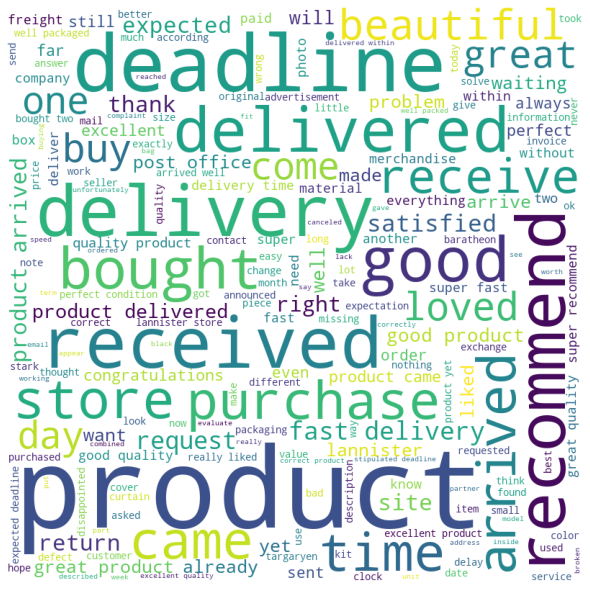

In [37]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df_union.English_Comment: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [209]:
nlp['english'] = nlp['review_comment_message'].apply(translator.translate, src='pt', dest='en').apply(getattr, args=('text',))

NameError: name 'translator' is not defined

## Td-idf

In [184]:
nlp['review_comment_message'].isnull().sum()

0

In [185]:
# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(nlp['review_comment_message'])

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [186]:
cvect_df = pd.DataFrame(csr_mat.toarray(), columns = words)

In [187]:
cvect_df

00  000  0000000000000000000000000  000000995  000024453  000580  \
0      0.0  0.0                        0.0        0.0        0.0     0.0   
1      0.0  0.0                        0.0        0.0        0.0     0.0   
2      0.0  0.0                        0.0        0.0        0.0     0.0   
3      0.0  0.0                        0.0        0.0        0.0     0.0   
4      0.0  0.0                        0.0        0.0        0.0     0.0   
...    ...  ...                        ...        ...        ...     ...   
49873  0.0  0.0                        0.0        0.0        0.0     0.0   
49874  0.0  0.0                        0.0        0.0        0.0     0.0   
49875  0.0  0.0                        0.0        0.0        0.0     0.0   
49876  0.0  0.0                        0.0        0.0        0.0     0.0   
49877  0.0  0.0                        0.0        0.0        0.0     0.0   

       001063  001689  003566  003570  00m  00x  00x2   01  010  011  012  \
0         0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
1         0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
2         0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
3         0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
4         0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
...       ...     ...     ...     ...  ...  ...   ...  ...  ...  ...  ...   
49873     0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
49874     0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
49875     0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
49876     0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   
49877     0.0     0.0     0.0     0.0  0.0  0.0   0.0  0.0  0.0  0.0  0.0   

       012339  012495  015094  0164928917  0164929116  01josi  01un   02  020  \
0         0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
1         0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
2         0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
3         0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
4         0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
...       ...     ...     ...         ...         ...     ...   ...  ...  ...   
49873     0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
49874     0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
49875     0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
49876     0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   
49877     0.0     0.0     0.0         0.0         0.0     0.0   0.0  0.0  0.0   

       021385  02645364747  02653047820  0269   03   04  04108020   05  05ml  \
0         0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
1         0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
2         0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
3         0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
4         0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
...       ...          ...          ...   ...  ...  ...       ...  ...   ...   
49873     0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
49874     0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
49875     0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
49876     0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   
49877     0.0          0.0          0.0   0.0  0.0  0.0       0.0  0.0   0.0   

       05un   06  0602017   07  0763  078   08  0800   09  0branca   0k   0m  \
0       0.0  0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0      0.0  0.0  0.0   
1       0.0  0.0      0.0  0.0   0.0  0.0  0.0   0.0  0.0      0.0  0.0  0.0

In [188]:
for i in range(len(nlp['review_score'])):
    if nlp['review_score'][i] >= 3:
        nlp['review_score'][i] = 1
    else:
        nlp['review_score'][i] = 0

<ipython-input-188-343442a2690b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp['review_score'][i] = 1
<ipython-input-188-343442a2690b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nlp['review_score'][i] = 0


In [189]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

In [190]:
#train_test_split params(X vetorizados, y array(labels), tamanho do conj teste, random_state ???)
X_train, X_test, y_train, y_test = train_test_split(cvect_df, nlp['review_score'].values, test_size = 0.20, random_state = 42)

print('X_train shape ',X_train.shape)
print('X_test shape ',X_test.shape)
print('y_train shape ',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape  (39902, 16067)
X_test shape  (9976, 16067)
y_train shape  (39902,)
y_test shape (9976,)


In [249]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [250]:
predict_y = classifier.predict(X_test) #predicoes feitas pelo modelo
probabilities_y = classifier.predict_proba(X_test)

In [255]:
predict_y

array([1, 1, 1, ..., 1, 1, 1])

In [256]:
probabilities_y

array([[0.00105502, 0.99894498],
       [0.00103709, 0.99896291],
       [0.0224074 , 0.9775926 ],
       ...,
       [0.00268972, 0.99731028],
       [0.2960881 , 0.7039119 ],
       [0.00625612, 0.99374388]])

In [ ]:
probabilities_y_train = classifier.predict_proba(X_train)

In [ ]:
loc = []
for index,value in enumerate(probabilities_y_train):
    if abs(value[1]-value[0])<0.2:
        loc.append(index)

In [ ]:
table = pd.DataFrame(X_train,y_train)
table[loc]

In [ ]:
table[loc][X_train]

In [ ]:
table[loc][X_train]

## if treat negative comment as positive, this will be very bad

In [272]:
con_matr = confusion_matrix(y_test, predict_y)
con_df = pd.DataFrame(con_matr, index = ['negative','positive'],columns = ['negative','positive']) 
con_df

negative  positive
negative      2362       540
positive       676      6398

In [276]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80      2902
           1       0.92      0.90      0.91      7074

    accuracy                           0.88      9976
   macro avg       0.85      0.86      0.85      9976
weighted avg       0.88      0.88      0.88      9976



## logistic regression

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
lr = LogisticRegression()

In [193]:
lr.fit(X_train, y_train)

LogisticRegression()

In [194]:
predict_y_lr = lr.predict(X_test)

In [198]:
probabilities_y_lr = lr.predict_proba(X_test)

In [199]:
probabilities_y_lr

array([[2.55238287e-04, 9.99744762e-01],
       [1.26256786e-03, 9.98737432e-01],
       [3.83752750e-02, 9.61624725e-01],
       ...,
       [1.73023033e-02, 9.82697697e-01],
       [5.55813402e-01, 4.44186598e-01],
       [3.17399121e-02, 9.68260088e-01]])

In [195]:
con_matr_lr = confusion_matrix(y_test, predict_y_lr)
con_df_lr = pd.DataFrame(con_matr_lr, index = ['negative','positive'],columns = ['negative','positive']) 
con_df_lr

negative  positive
negative      2467       435
positive       552      6522

In [196]:
print(classification_report(y_test, predict_y_lr))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2902
           1       0.94      0.92      0.93      7074

    accuracy                           0.90      9976
   macro avg       0.88      0.89      0.88      9976
weighted avg       0.90      0.90      0.90      9976



In [201]:
nlp['sentiment'] = predict_y_lr

review_score                             review_comment_message
0                 1  Não testei o produto ainda, mas ele veio corre...
1                 1  Não testei o produto ainda, mas ele veio corre...
2                 1  Não testei o produto ainda, mas ele veio corre...
3                 1                               Muito bom o produto.
4                 1  O produto foi exatamente o que eu esperava e e...
...             ...                                                ...
49873             0  Ele não é um mini cajon, é um shaker, ou seja,...
49874             1       So uma peça que veio rachado mas tudo bem rs
49875             1                       Foi entregue antes do prazo.
49876             0  Foi entregue somente 1. Quero saber do outro p...
49877             0  Foi entregue somente 1. Quero saber do outro p...

[49878 rows x 2 columns]

In [204]:
nlp

review_score                             review_comment_message
0                 1  Não testei o produto ainda, mas ele veio corre...
1                 1  Não testei o produto ainda, mas ele veio corre...
2                 1  Não testei o produto ainda, mas ele veio corre...
3                 1                               Muito bom o produto.
4                 1  O produto foi exatamente o que eu esperava e e...
...             ...                                                ...
49873             0  Ele não é um mini cajon, é um shaker, ou seja,...
49874             1       So uma peça que veio rachado mas tudo bem rs
49875             1                       Foi entregue antes do prazo.
49876             0  Foi entregue somente 1. Quero saber do outro p...
49877             0  Foi entregue somente 1. Quero saber do outro p...

[49878 rows x 2 columns]

## adaboost

In [289]:
from sklearn.ensemble import AdaBoostClassifier

In [290]:
adb = AdaBoostClassifier(n_estimators=100, random_state=0)

In [291]:
adb.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [296]:
predicted_y_adb = adb.predict(X_test)

In [297]:
con_matr_adb = confusion_matrix(y_test, predicted_y_adb)
con_df_adb = pd.DataFrame(con_matr_adb, index = ['negative','positive'],columns = ['negative','positive']) 
con_df_adb

negative  positive
negative      2225       677
positive       685      6389

In [299]:
print(classification_report(y_test, predicted_y_adb))

              precision    recall  f1-score   support

           0       0.76      0.77      0.77      2902
           1       0.90      0.90      0.90      7074

    accuracy                           0.86      9976
   macro avg       0.83      0.83      0.83      9976
weighted avg       0.86      0.86      0.86      9976

